# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


In [ ]:
print(cities)

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | mayo
Processing Record 3 of Set 1 | dunedin
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | ostrovnoy
Processing Record 7 of Set 1 | narsaq
Processing Record 8 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 1 | chapais
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | kidal
Processing Record 12 of Set 1 | te anau
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | tarko-sale
Processing Record 16 of Set 1 | storm lake
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | najran
Processing Record 19 of Set 1 | svetlogorsk
Processing Record 20 of Set 1 | kautokeino
Processing Record 21 of Set 1 | tabuk
Processing Record 22 of Set 1 | castro
Processing Record 23 of Set 1 | 

Processing Record 39 of Set 4 | college
Processing Record 40 of Set 4 | tilichiki
Processing Record 41 of Set 4 | katsuura
Processing Record 42 of Set 4 | aasiaat
Processing Record 43 of Set 4 | cayenne
Processing Record 44 of Set 4 | upernavik
Processing Record 45 of Set 4 | voznesenye
Processing Record 46 of Set 4 | arlit
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | reni
Processing Record 49 of Set 4 | vardo
Processing Record 0 of Set 5 | rock springs
Processing Record 1 of Set 5 | oranjemund
Processing Record 2 of Set 5 | trebinje
Processing Record 3 of Set 5 | gillette
Processing Record 4 of Set 5 | termiz
Processing Record 5 of Set 5 | protivin
Processing Record 6 of Set 5 | fuenlabrada
Processing Record 7 of Set 5 | vila velha
Processing Record 8 of Set 5 | sur
Processing Record 9 of Set 5 | georgetown
Processing Record 10 of Set 5 | nishihara
Processing Record 11 of Set 5 | hilo
Processing Record 12 of Set 5 | tuktoyaktuk
Processing Record 13 of Set 

Processing Record 25 of Set 8 | axim
Processing Record 26 of Set 8 | deep river
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | coahuayana
Processing Record 29 of Set 8 | nicoya
Processing Record 30 of Set 8 | sibolga
Processing Record 31 of Set 8 | rungata
City not found. Skipping...
Processing Record 32 of Set 8 | perustica
City not found. Skipping...
Processing Record 33 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 34 of Set 8 | marion
Processing Record 35 of Set 8 | gejiu
Processing Record 36 of Set 8 | hobyo
Processing Record 37 of Set 8 | mporokoso
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | katobu
Processing Record 40 of Set 8 | alofi
Processing Record 41 of Set 8 | astana
Processing Record 42 of Set 8 | nizhneudinsk
Processing Record 43 of Set 8 | borinskoye
Processing Record 44 of Set 8 | moerai
Processing Record 45 of Set 8 | sarny
Processing Record 46 of Set 8 | kununurra
Processing Record 47 of

Processing Record 11 of Set 12 | quang ngai
Processing Record 12 of Set 12 | caramay
Processing Record 13 of Set 12 | opuwo
Processing Record 14 of Set 12 | krasnyy klyuch
Processing Record 15 of Set 12 | bantry
Processing Record 16 of Set 12 | bubaque
Processing Record 17 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 18 of Set 12 | jardim
Processing Record 19 of Set 12 | riosucio
Processing Record 20 of Set 12 | ulaangom
Processing Record 21 of Set 12 | baruun-urt
Processing Record 22 of Set 12 | maniitsoq
Processing Record 23 of Set 12 | daru
Processing Record 24 of Set 12 | nueva loja
Processing Record 25 of Set 12 | kaduqli
Processing Record 26 of Set 12 | mitsamiouli
Processing Record 27 of Set 12 | marsh harbour
Processing Record 28 of Set 12 | amarante do maranhao
Processing Record 29 of Set 12 | avera
Processing Record 30 of Set 12 | santa ines
Processing Record 31 of Set 12 | nelson bay
Processing Record 32 of Set 12 | bilibino
Processing Record 33 of Se

In [4]:
#Test city to see what I get as an output 
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Boston"
city_url = url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(city_url).json()['dt']
response

1667857292

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Hobart"
city_url = url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(city_url).json()
response

{'coord': {'lon': 147.3294, 'lat': -42.8794},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 289.99,
  'feels_like': 289.82,
  'temp_min': 287.18,
  'temp_max': 290.4,
  'pressure': 1013,
  'humidity': 80},
 'visibility': 10000,
 'wind': {'speed': 3.09, 'deg': 310},
 'clouds': {'all': 0},
 'dt': 1667858022,
 'sys': {'type': 2,
  'id': 2002195,
  'country': 'AU',
  'sunrise': 1667846754,
  'sunset': 1667898175},
 'timezone': 39600,
 'id': 2163355,
 'name': 'Hobart',
 'cod': 200}

In [ ]:
print(city_data)

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_dict = {"City": cities, 
             "Lat": city_lat, 
             "Lng": city_lng, 
             "Max Temp": city_max_temp,
             "Humidity": city_humidity,
             "Cloudiness": city_clouds,
             "Wind Speed": city_wind,
             "Country": city_country,
             "Date": city_date
                 }
cityDF = pd.DataFrame .from_records(city_data)
cityDF
# Show Record Count
cityDF.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [7]:
# Display sample data
cityDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,57.79,44,1,12.66,US,1667857658
1,mayo,38.8876,-76.5119,78.75,45,0,8.05,US,1667857815
2,dunedin,-45.8742,170.5036,59.38,64,60,4.12,NZ,1667857661
3,kavieng,-2.5744,150.7967,82.24,75,92,4.63,PG,1667857753
4,jamestown,42.0970,-79.2353,49.71,52,0,14.97,US,1667857816


In [9]:
# Export the City_Data into a csv
cityDF.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,57.79,44,1,12.66,US,1667857658
1,mayo,38.8876,-76.5119,78.75,45,0,8.05,US,1667857815
2,dunedin,-45.8742,170.5036,59.38,64,60,4.12,NZ,1667857661
3,kavieng,-2.5744,150.7967,82.24,75,92,4.63,PG,1667857753
4,jamestown,42.0970,-79.2353,49.71,52,0,14.97,US,1667857816


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [11]:
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

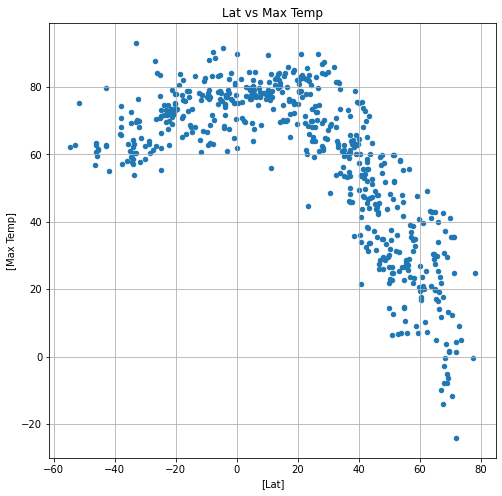

In [12]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot.scatter(x=['Lat'], y=['Max Temp'], grid=True,figsize=(8,8), title="Lat vs Max Temp")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

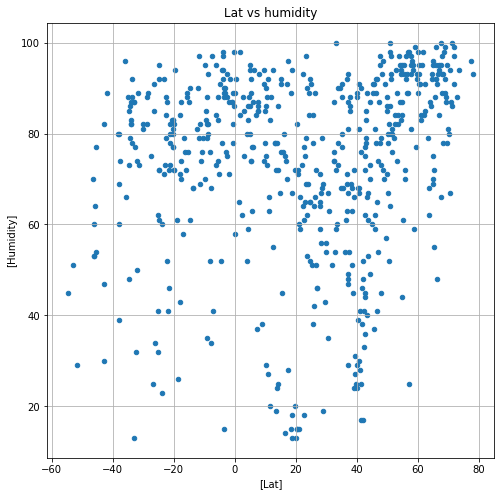

In [13]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot.scatter(x=['Lat'], y=['Humidity'], grid=True,figsize=(8,8), title="Lat vs humidity")


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

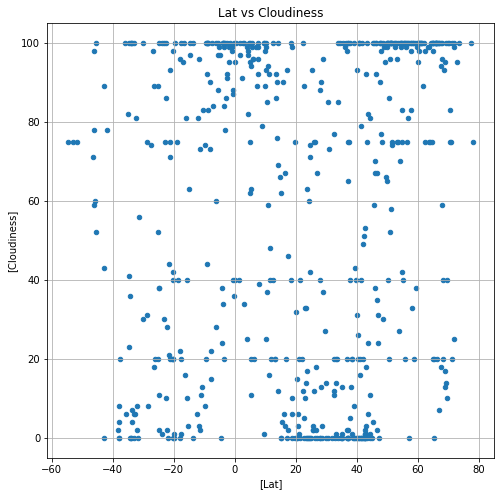

In [14]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot.scatter(x=['Lat'], y=['Cloudiness'], grid=True,figsize=(8,8), title="Lat vs Cloudiness")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

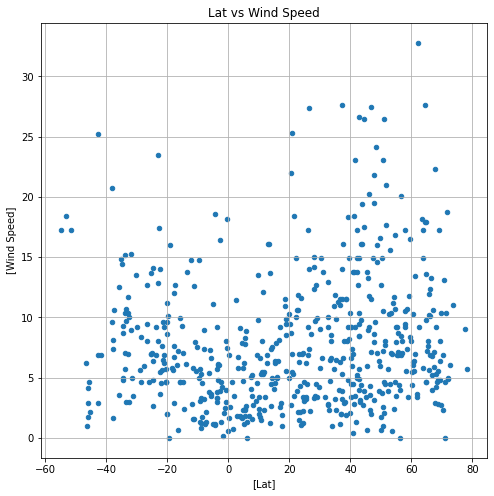

In [15]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot.scatter(x=['Lat'], y=['Wind Speed'], grid=True,figsize=(8,8), title="Lat vs Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The correlation between latitude and the maximum temperature is -0.49


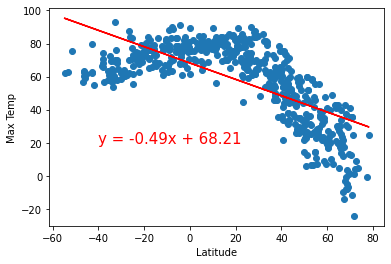

In [16]:
# Define a function to create Linear Regression plots
# Lat vs Max Temp = 
x = city_data_df['Lat'].reset_index()
x = x.drop(columns=['City_ID'])
x = x.squeeze()
x
y = city_data_df['Max Temp'].reset_index()
y = y.drop(columns=['City_ID'])
y = y.squeeze()
y
correlation = stats.pearsonr(x,y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The correlation between latitude and the maximum temperature is {round(linregress(x,y)[0],2)}")

The correlation between latitude and the Humidity is 0.09


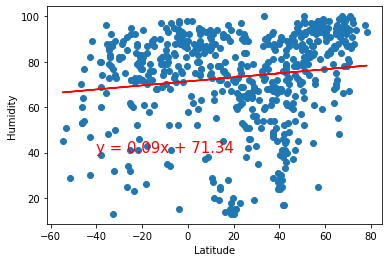

In [17]:
# Lat vs Humidity = 
t = city_data_df['Humidity'].reset_index()
t = t.drop(columns=['City_ID'])
t = t.squeeze()
t
correlation = stats.pearsonr(x,t)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, t)
regress_values = x * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(x,t)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The correlation between latitude and the Humidity is {round(linregress(x,t)[0],2)}")

The correlation between latitude and the Cloudiness is 0.16


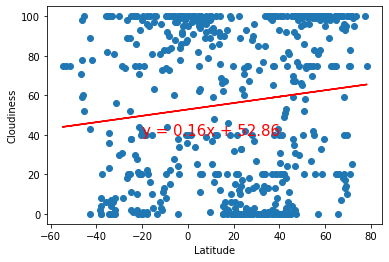

In [18]:
# Lat vs Clousdiness = 
r = city_data_df['Cloudiness'].reset_index()
r = r.drop(columns=['City_ID'])
r = r.squeeze()
r
correlation = stats.pearsonr(x,r)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, r)
regress_values = x * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(x,r)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The correlation between latitude and the Cloudiness is {round(linregress(x, r)[0],2)}")

The correlation between latitude and the Wind Speed is 0.02


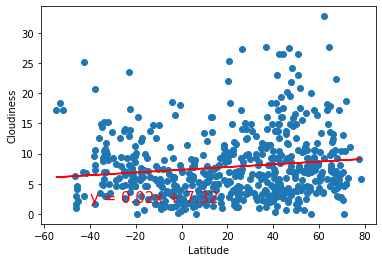

In [19]:
e = city_data_df['Wind Speed'].reset_index()
e = e.drop(columns=['City_ID'])
e = e.squeeze()
e
correlation = stats.pearsonr(x,e)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, e)
regress_values = x * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(x,e)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-40,2),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The correlation between latitude and the Wind Speed is {round(linregress(x, e)[0],2)}")

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = cityDF[cityDF['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,57.79,44,1,12.66,US,1667857658
1,mayo,38.8876,-76.5119,78.75,45,0,8.05,US,1667857815
4,jamestown,42.0970,-79.2353,49.71,52,0,14.97,US,1667857816
5,ostrovnoy,68.0531,39.5131,30.58,93,96,5.32,RU,1667857816
6,narsaq,60.9167,-46.0500,20.80,83,100,6.40,GL,1667857817


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= cityDF[cityDF['Lat'] <= 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,dunedin,-45.8742,170.5036,59.38,64,60,4.12,NZ,1667857661
3,kavieng,-2.5744,150.7967,82.24,75,92,4.63,PG,1667857753
10,te anau,-45.4167,167.7167,61.47,54,52,2.15,NZ,1667857819
12,rikitea,-23.1203,-134.9692,73.20,92,100,23.47,PF,1667857819
15,bluff,-46.6000,168.3333,56.77,70,71,6.22,NZ,1667857820


###  Temperature vs. Latitude Linear Regression Plot

The correlation between latitude and the maximum temperature in the northern hemispere is -1.08


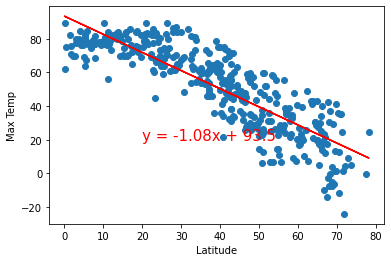

In [22]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots
# Northern hem Lat vs Max Temp = 
x = northern_hemi_df['Lat'].reset_index()
x = x.drop(columns=['index'])
x = x.squeeze()
x
y = northern_hemi_df['Max Temp'].reset_index()
y = y.drop(columns=['index'])
y = y.squeeze()
y
correlation = stats.pearsonr(x,y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The correlation between latitude and the maximum temperature in the northern hemispere is {round(linregress(x,y)[0],2)}")

The correlation between latitude and the maximum temperature in the southern hemispere is 0.33


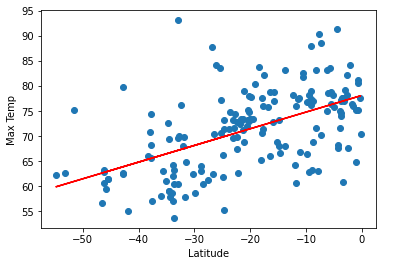

In [23]:
# Linear regression on Southern Hemisphere
# Define a function to create Linear Regression plots
# Southern hem Lat vs Max Temp = 
xx = southern_hemi_df['Lat'].reset_index()
xx = xx.drop(columns=['index'])
xx = xx.squeeze()
xx
yy = southern_hemi_df['Max Temp'].reset_index()
yy = yy.drop(columns=['index'])
yy = yy.squeeze()
yy
correlation = stats.pearsonr(xx,yy)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xx, yy)
regress_values = xx * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(xx,yy)
plt.plot(xx,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The correlation between latitude and the maximum temperature in the southern hemispere is {round(linregress(xx,yy)[0],2)}")

Analysis for temperature vs latitude, the northern shows a stronger correlation of a higher tempature as you get closer to the equater. Although, there are less data points for the southern hemispere which likely impacted the graph.

### Humidity vs. Latitude Linear Regression Plot

The correlation between latitude and the humidity e in the northern hemispere is 0.3


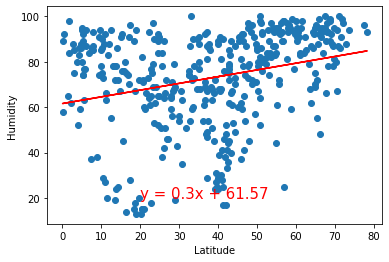

In [24]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots
# Northern hem Lat vs Humidity = 
l = northern_hemi_df['Humidity'].reset_index()
l = l.drop(columns=['index'])
l = l.squeeze()
l
correlation = stats.pearsonr(x,l)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, l)
regress_values = x * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(x,l)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The correlation between latitude and the humidity e in the northern hemispere is {round(linregress(x,l)[0],2)}")

The correlation between latitude and the humidity in the southern hemispere is 0.43


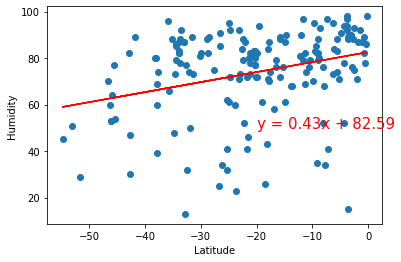

In [25]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots
# southern hem Lat vs Humidity = 
tt = southern_hemi_df['Humidity'].reset_index()
tt = tt.drop(columns=['index'])
tt = tt.squeeze()
tt
correlation = stats.pearsonr(xx,tt)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xx, tt)
regress_values = xx * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(xx,tt)
plt.plot(xx,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The correlation between latitude and the humidity in the southern hemispere is {round(linregress(xx,tt)[0],2)}")

Analysis for humidity vs latitude, both the southern and northern hemispheres have similar correlation numbers of .43 and .3. Once again more data is in the northern hemisphere but the correlation appears similar.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between latitude and the cloudiness in the northern hemispere is 0.4


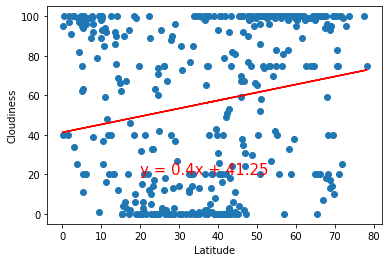

In [26]:
# Northern Hemisphere
# # Northern hem Lat vs Cloudiness = 
j = northern_hemi_df['Cloudiness'].reset_index()
j = j.drop(columns=['index'])
j = j.squeeze()
j
correlation = stats.pearsonr(x,j)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, j)
regress_values = x * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(x,j)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The correlation between latitude and the cloudiness in the northern hemispere is {round(linregress(x,j)[0],2)}")

The correlation between latitude and the cloudiness in the southern hemispere is 0.71


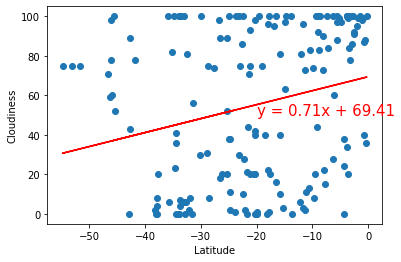

In [27]:
# Southern Hemisphere
# southern hem Lat vs cloudiness = 
cc = southern_hemi_df['Cloudiness'].reset_index()
cc = cc.drop(columns=['index'])
cc = cc.squeeze()
cc
correlation = stats.pearsonr(xx,cc)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xx, cc)
regress_values = xx * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(xx,cc)
plt.plot(xx,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The correlation between latitude and the cloudiness in the southern hemispere is {round(linregress(xx,cc)[0],2)}")

Analysis for cloudiness vs latitude, the southern hemisphere shows a stronger correlation of cloudiness as you approach the equader. This is surpising and it would be interesting to look into what other factors contribute to cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between latitude and the wind speed in the northern hemispere is 0.06


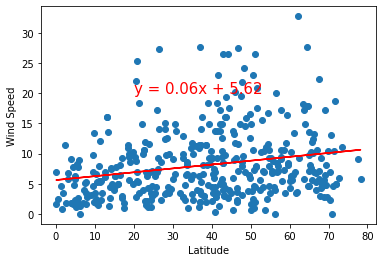

In [28]:
# Northern Hemisphere
# # Northern hem Lat vs Wind Speed = 
u = northern_hemi_df['Wind Speed'].reset_index()
u = u.drop(columns=['index'])
u = u.squeeze()
u
correlation = stats.pearsonr(x,u)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, u)
regress_values = x * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(x,u)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The correlation between latitude and the wind speed in the northern hemispere is {round(linregress(x,u)[0],2)}")

The correlation between latitude and the wind speed in the southern hemispere is -0.11


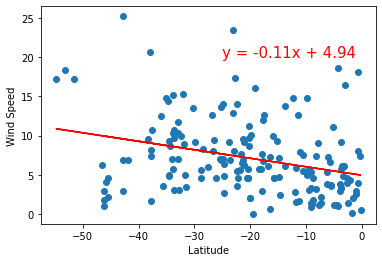

In [29]:
# Southern Hemisphere
# Southern hem Lat vs Wind Speed = 
ss = southern_hemi_df['Wind Speed'].reset_index()
ss = ss.drop(columns=['index'])
ss = ss.squeeze()
ss
correlation = stats.pearsonr(xx,ss)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xx, ss)
regress_values = xx * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(xx,ss)
plt.plot(xx,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red") #add in regression equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The correlation between latitude and the wind speed in the southern hemispere is {round(linregress(xx,ss)[0],2)}")

Analysis for wind speed vs latitude, in both hemispheres the correlation is near zero.